In [2]:
!pip install phate scprep umap-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import phate
import umap
import scprep
import os

In [4]:
scprep.io.download.download_google_drive(id='14ahKKvzjlSa5w6YUDUthNESHGU8naPdw',
                                         destination='data.pickle.gz')
scprep.io.download.download_google_drive(id='1-XvGMHn_fluRlxcyoScVCSQphrvABSsj',
                                         destination='metadata.pickle.gz')
data = pd.read_pickle('data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

In [5]:
data.head()

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A4GALT (ENSG00000128274),AAAS (ENSG00000094914),AACS (ENSG00000081760),AADAT (ENSG00000109576),AAED1 (ENSG00000158122),...,ZW10 (ENSG00000086827),ZWILCH (ENSG00000174442),ZWINT (ENSG00000122952),ZXDA (ENSG00000198205),ZXDB (ENSG00000198455),ZXDC (ENSG00000070476),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549)
AAACATTGAAAGCA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.867284,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.023075,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAAGATCTGGTACT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AAAGGCCTAACCGT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.783583,0.0,0.0,0.0,0.0,1.261183,0.0,0.0


In [28]:
import sklearn.datasets
data_swiss_roll, color_swiss_roll =sklearn.datasets.make_swiss_roll(n_samples=1500)
data_swiss_roll -= np.mean(data_swiss_roll, axis=0)
color_swiss_roll -= np.mean(color_swiss_roll, axis=0)

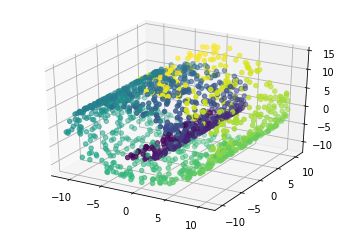

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_swiss_roll[:,0], data_swiss_roll[:,1], data_swiss_roll[:,2], c=color_swiss_roll)

In [4]:
from HW.CPSC453_PS1.Code.ps1_functions import compute_distances, compute_affinity_matrix

A = compute_distances(data_swiss_roll)


In [9]:
n = A.shape[0]
W = compute_affinity_matrix(A, 'gaussian', sigma=3)
row_sum = np.sum(W,axis=1) # axis=1 is row sum
D = np.diag(row_sum)
D_half_inv = np.sqrt(np.linalg.inv(D))
L = np.identity(n) - D_half_inv.dot(W).dot(D_half_inv)


In [23]:
eigVal, eigVector = np.linalg.eigh(L)

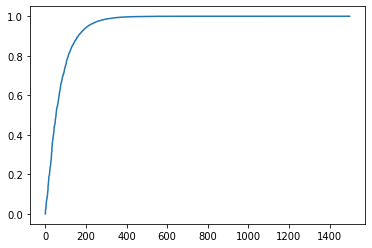

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.plot(eigVal)

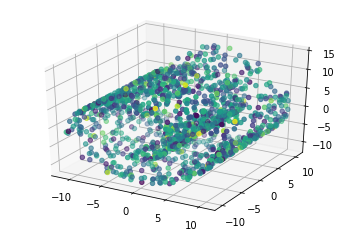

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(data_swiss_roll[:,0],data_swiss_roll[:,1],data_swiss_roll[:,2],c=eigVector[:,0])